In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Carpov/Data_set/

/content/drive/MyDrive/Colab Notebooks/Carpov/Data_set


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

### Загрузим датасет с машинами. Цель - верно восстанавливать для каждой из них цену продажи!

In [4]:
data = pd.read_csv('autos.csv')

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
### Колонка с тергетом - "selling price"

X = data.drop("selling_price", axis=1)
y = data["selling_price"]

### Будем замерять MSLE!
### Поэтому прологарифмируем таргет
### А после оптимизируем MSE

y = y.apply(np.log1p)

In [6]:
### Разделим выборку на трейн и тест!

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

__Задание__

Реализуйте свой MeanTargetEncoder с добавленем некоторого шума!

Однажды в лекционном материале, обсуждая счетчики, мы говорили с вами о том, что из-за них модели могут переобучаться. Один из способов бороться с этим - валидировать расчеты среднего таргета (стратегия отложенной выборки / расчеты на кросс-валидации). Но есть еще проще!

Можно просто к значению счетчика добавить случайный шум (зашумить данные)!

Напомним, что рассчитываться новые признаки должны по такой формуле:

$$
g_j = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}{l} + C * \epsilon
$$



Пусть шум будет случайной величиной из нормального стандартного распределения, то есть $\epsilon \sim N(0, 1) $, а $ C = 0.006$.

Создавая свой класс-трансформер, наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`. Трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и список из числовых признаков.

Если для какого-то признака в тестовой выборке отсутствует значение, трансформер должен поставить там 0.

На выходе должен получиться датасет того же размера с измененными категориальными признаками.

Класс MeanTargetEncoderNoise должен иметь следующую сигнатуру:



In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):

    def __init__(self, categorical, numeric):
        ### Your code is here

    def fit(self, X, y):
        ### Your code is here

        return self

    def transform(self, df):
        ### Your code is here

        return temp

IndentationError: expected an indented block after function definition on line 5 (<ipython-input-7-bd75101a7fe2>, line 8)

Разделите колонки на вещественные и категориальные. Приведите все категориальные колонки к типу `object`.

Далее применим наш кодировщик к `X_train, X_test`, так же как например мы применяем `StandardScaler`, чтобы проверить работоспособность нашего класса. Установите зерно датчика случайный чисел `np.random.seed(1)`.

После того, как вы изменили обучающую и тестовую выборки, сохраните первые 10 строк полученного промежуточного датафрейма обучающей выборки (`X_train`) в файл в формате csv с сепаратором `;`. Не забудьте индекс. Отправьте полученный файл в форму ниже.

Список колонок которые должны быть в файле для сдачи:
```py
cols = [
    "km_driven",
    "name",
    "year",
    "fuel",
    "seller_type",
    "transmission",
    "owner"
]
```

### Ваше решение


Разделение колонок на категориальные и числовые.

In [7]:
object_cols = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['km_driven']

X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [8]:
X[object_cols] = X[object_cols].astype(object)
X_test[object_cols] = X_test[object_cols].astype(object)
X_train[object_cols] = X_train[object_cols].astype(object)

In [9]:
np.random.seed(1)

def func1(x):
  return np.sum(x)/x.size + 0.006 * np.random.normal(loc = 0.0, scale = 1.0, size = 1)[0]

Реализация класса MeanTargetEncoderNoise.

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools
class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):

    def __init__(self, categorical, numeric):
        self.categorical = categorical
        self.numeric = numeric
        ### Your code is here

    def fit(self, X, y):

        ### Your code is here
        X['y'] = y
        arr = []

        for i in self.categorical:
          temp = X.groupby(i).agg({'y':[func1]}).reset_index()
          arr.append((list(temp[i]), list(temp['y']['func1'])))

          self.arr = arr

        return self

    def transform(self, df):

        ### Your code is here
        arr = self.arr
        temp = pd.DataFrame()

        c = 0

        for i in self.categorical:

          setik = set(df[i].unique())
          setik.difference_update(set(arr[c][0]))

          column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
          column = column.replace(list(setik), 0).reset_index()[i]

          temp = pd.concat([temp, column], axis = 1)
          c+=1

        temp = pd.concat([df[self.numeric].reset_index(drop = True), temp], axis = 1)


        return temp

Проверка работы трансформера.

In [11]:
np.random.seed(1)
transformer = MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head(10)

,km_driven,name,year,fuel,seller_type,transmission,owner
0,50000,13.483692,13.436559,13.093756,12.615863,13.771135,12.977730
1,70000,12.117029,11.903115,12.453832,12.615863,13.771135,12.977730
2,50000,12.310456,13.328864,12.453832,12.615863,12.639805,12.977730
3,92198,12.491443,13.042359,12.453832,13.152824,12.639805,12.463313
4,3240,12.390906,12.870886,12.453832,12.615863,12.639805,12.463313
5,10000,12.687432,13.436559,12.453832,13.152824,12.639805,12.977730
6,90000,11.698702,11.503504,12.453832,12.615863,12.639805,11.878390
7,79000,11.120678,11.503504,12.453832,12.615863,12.639805,12.463313
8,99700,13.172879,13.328864,13.093756,12.615863,12.639805,12.977730
9,124000,13.004194,12.241213,13.093756,12.615863,12.639805,12.463313


In [12]:
train.head(10).to_csv('res', sep = ';', index = False)

Обучите несколько деревьев, перебирая максимальную глубину алгоритма из списка `max_depth_list`, а остальные параметры оставьте дефолтными. Выведите лучшее значение гиперпараметра. Постройте график зависимости MSLE на тестовой выборке от значения гиперпараметра. Воспользуйтесь `Pipeline` без `GridSearch`. Проделайте то же самое с `min_samples_split`, `min_impurity_decrease`, `max_leaf_nodes`. (по 2б на каждый параметр)

In [13]:
max_depth_list = [3, 5, 8, 12]
min_samples_split_list = [10, 50, 100, 500]
min_impurity_decrease_list = [0, 0.1, 0.15, 0.2]
max_leaf_nodes_list = [100, 200, 500]

In [14]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

np.random.seed(1)

### Your code is here
rmse1 = []

for max_depth in max_depth_list:
  pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
                   ('decision_tree', DecisionTreeRegressor(max_depth=max_depth))])
  pipe.fit(X_train, y_train)
  preds = pipe.predict(X_test)

  rmse1.append(mse(preds, y_test, squared = True))




In [15]:
rmse2 = []
np.random.seed(1)

for min_samples_split in min_samples_split_list:
  pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
                   ('decision_tree', DecisionTreeRegressor(max_depth=max_depth))])
  pipe.fit(X_train, y_train)
  preds = pipe.predict(X_test)

  rmse2.append(mse(preds, y_test, squared = True))


In [16]:
rmse3 = []
np.random.seed(1)

for min_impurity_decrease in min_impurity_decrease_list:
  pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
   ('decision_tree', DecisionTreeRegressor(min_impurity_decrease=min_impurity_decrease))])

  pipe.fit(X_train, y_train)
  preds = pipe.predict(X_test)
  rmse3.append(mse(preds, y_test, squared = True))


In [17]:
rmse4 = []
np.random.seed(1)

for max_leaf_nodes in max_leaf_nodes_list:
  pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical= object_cols, numeric = num_cols)),
                   ('decision_tree', DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes))])

  pipe.fit(X_train, y_train)
  preds = pipe.predict(X_test)

  rmse4.append(mse(preds, y_test, squared = True))



Text(0, 0.5, 'msle')

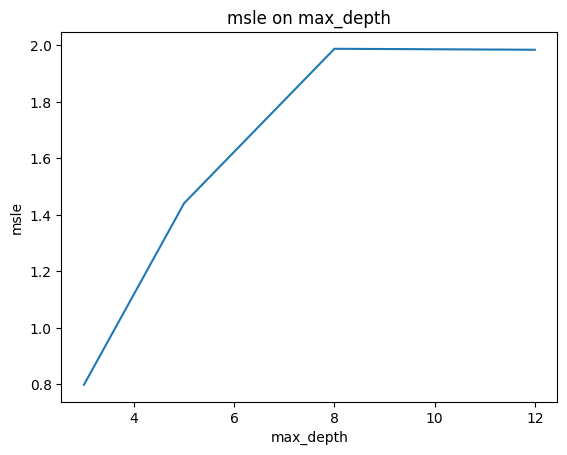

In [18]:
plt.plot(max_depth_list, rmse1)
plt.title('msle on max_depth')
plt.xlabel('max_depth')
plt.ylabel('msle')

Text(0, 0.5, 'msle')

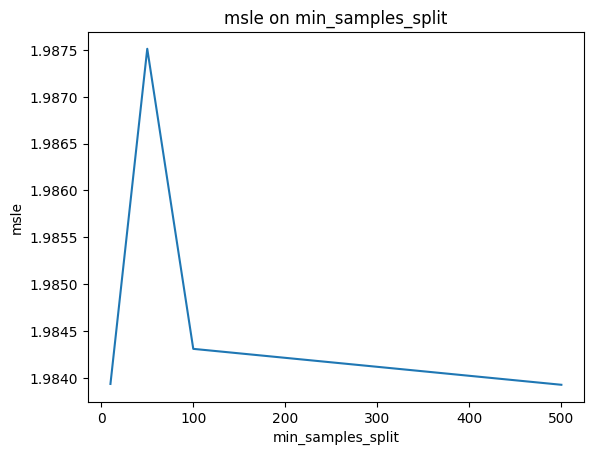

In [19]:
plt.plot(min_samples_split_list, rmse2)
plt.title('msle on min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('msle')

0.5189515041093942


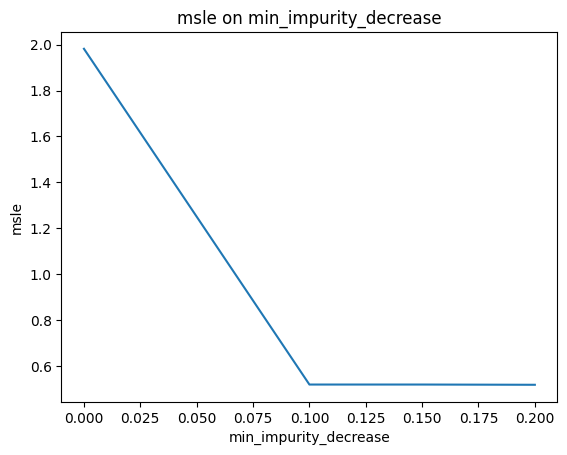

In [23]:
plt.plot(min_impurity_decrease_list, rmse3)
plt.title('msle on min_impurity_decrease')
plt.xlabel('min_impurity_decrease')
plt.ylabel('msle')
print(min(rmse3))

Text(0, 0.5, 'msle')

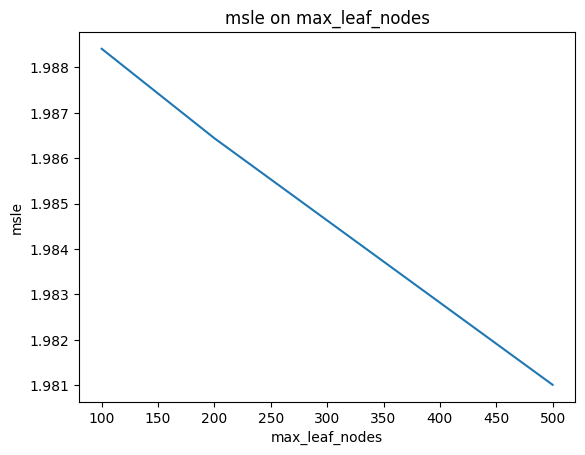

In [22]:
plt.plot(max_leaf_nodes_list, rmse4)
plt.title('msle on max_leaf_nodes')
plt.xlabel('max_leaf_nodes')
plt.ylabel('msle')

Подберите лучшую комбинацию параметров, используя `GridSearchCV` и набор массивов значений параметров из предыдущего задания. Для лучшей комбинации посчитайте MSLE на тестовой выборке. Получились ли лучшие параметры такими же, как если бы вы подбирали их по-отдельности при остальных гиперпараметрах по умолчанию (предыдущее задание)? (2б)

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "decision_tree__max_depth": [3, 5, 8, 12],
    "decision_tree__min_samples_split": [10, 50, 100, 500],
    "decision_tree__min_impurity_decrease": [0, 0.1, 0.15, 0.2],
    "decision_tree__max_leaf_nodes": [100, 200, 500]
}
np.random.seed(1)

### Your code is here
pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
                 ('decision_tree', DecisionTreeRegressor())])

grid = GridSearchCV(pipe,
                    param_grid,
                    cv = 4,
                    scoring='neg_mean_squared_error',
                    verbose = 10)
grid.fit(X_train, y_train)




Fitting 4 folds for each of 192 candidates, totalling 768 fits
[CV 1/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 1/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.050 total time=   1.5s
[CV 2/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 2/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.016 total time=   0.9s
[CV 3/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 3/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_l

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('custom_transformer',
                                        MeanTargetEncoderNoise(categorical=['name',
                                                                            'year',
                                                                            'fuel',
                                                                            'seller_type',
                                                                            'transmission',
                                                                            'owner'],
                                                               numeric=['km_driven'])),
                                       ('decision_tree',
                                        DecisionTreeRegressor())]),
             param_grid={'decision_tree__max_depth': [3, 5, 8, 12],
                         'decision_tree__max_leaf_nodes': [100, 200, 500],
                         'decision_tree__min_impurity_decrease': [0, 0.1, 0.15,
                                                                  0.2],
                         'decision_tree__min_samples_split': [10, 50, 100,
                                                              500]},
             scoring='neg_mean_squared_error', verbose=10)

In [26]:
mse(grid.best_estimator_.predict(X_test), y_test, squared = True)

0.5197845418970586